In [10]:
using PyPlot
using Statistics
using LaTeXStrings

include("/Users/zhenyuwei/NutStore/Codes/Machine_Learning/Functions/useful_func.jl")
include("/Users/zhenyuwei/NutStore/Codes/Machine_Learning/Functions/linear_func.jl")

function cost(theta, x, y)
    sum((theta[1] .+ theta[2].*x .- y).^2) / (2*length(y))
end

linear_norm (generic function with 1 method)

In [87]:
m = 10
x = [n for n in 0:9] .+ rand(m)*0.3
y = x .+ rand(length(x)) * 2
x = [ones(m) x]

theta = [-3.9; 1.5]
linear_grad(theta, x, y)
temp = ones(size(theta))
temp[:] = theta[:]
alpha = 0.001
num_steps = 10000
interval = 100
for step = 1:num_steps
    theta .-= alpha .* linear_grad(theta, x, y)
    if step % interval==0
        temp = hcat(temp, theta)
    end
end


In [104]:
theta

2-element Array{Float64,1}:
 1.0617544746212937
 0.9829807143298823

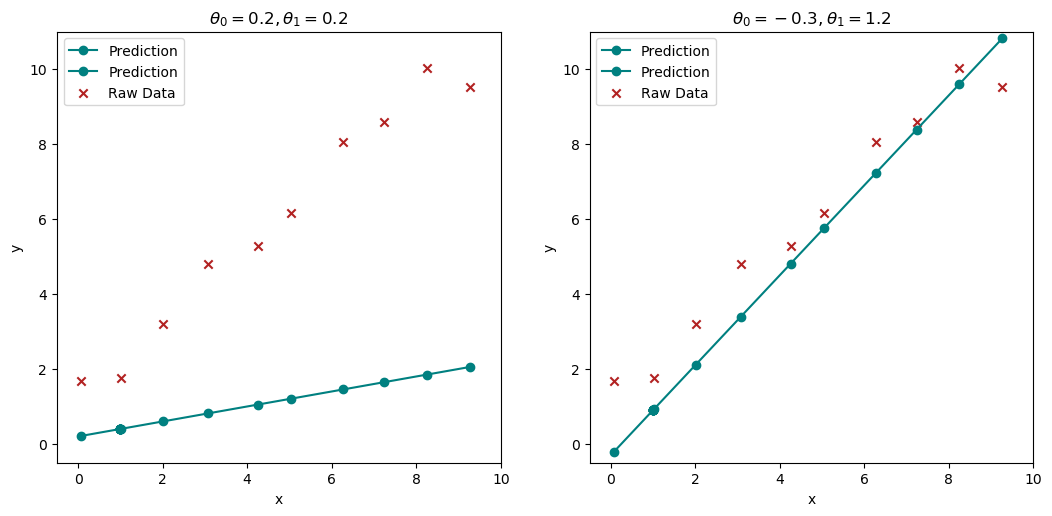

In [76]:
figure(figsize=[12.6, 5.6])

theta = [
    0.2 0.2
    -0.3 1.2
]
subplot(121)
scatter(x[:, 2], y, marker="x", label="Raw Data", c="firebrick")
plot(x, theta[1, 2] .* x .+ theta[1, 1], marker="o", c="teal", label="Prediction")
legend(loc="best")
title(L"\theta_0 = 0.2, \theta_1=0.2")
xlabel("x")
ylabel("y")
xlim(-0.5, 10)
ylim(-0.5, 11)

subplot(122)
scatter(x[:, 2], y, marker="x", label="Raw Data", c="firebrick")
plot(x, theta[2, 2] .* x .+ theta[2, 1], marker="o", c="teal", label="Prediction")
legend(loc="best")
title(L"\theta_0 = -0.3, \theta_1=1.2")
xlabel("x")
ylabel("y")
xlim(-0.5, 10)
ylim(-0.5, 11)

savefig("cost_func_data.svg", optimize=true, format="svg", transparent=true)

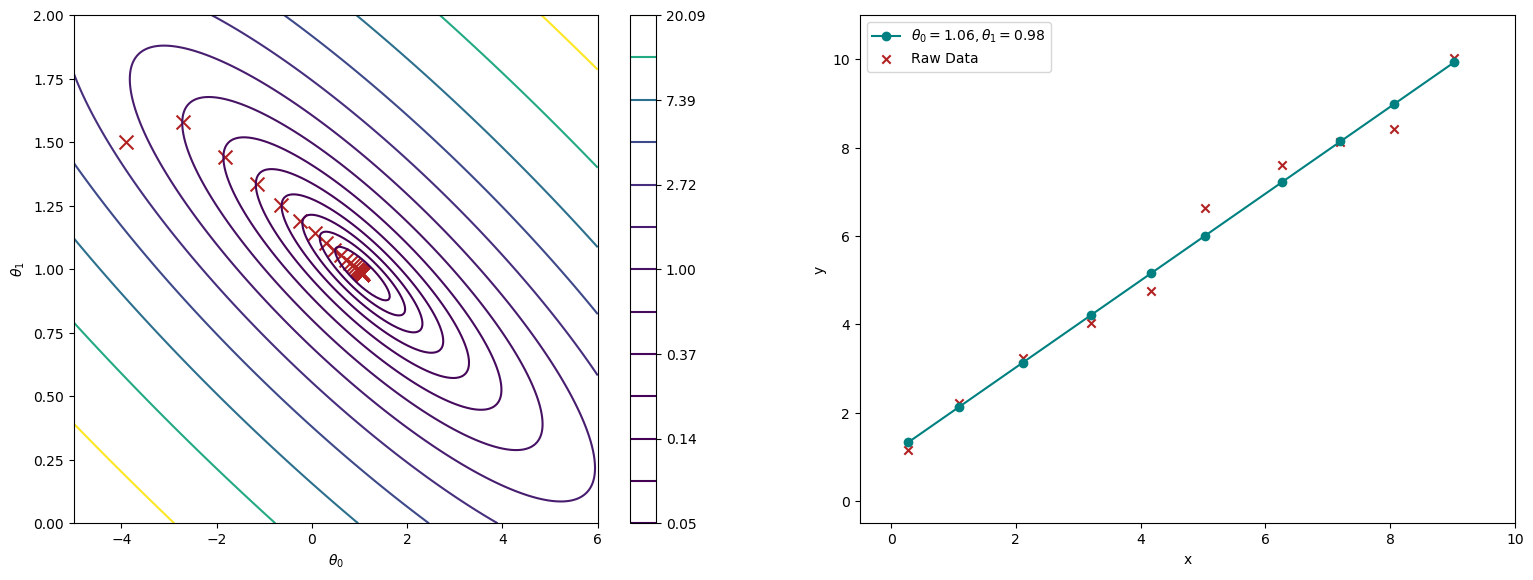

In [108]:
theta_0 = [n for n = -5:0.01:6]
theta_1 = [n for n = 0:0.01:2]
a, b = meshgrid(theta_0, theta_1)
data = [linear_cost([a[i, j]; b[i, j]], x, y) for i=1:length(theta_0), j = 1:length(theta_1)]

pos = minimum(data)
pos = findall(x->x==pos, data)

figure(figsize=[2-.6, 6.6])
subplot(121)
contour(a,b,data, [exp(n) for n=-3:0.5:3])
colorbar()
scatter(temp[1, :], temp[2, :], c="firebrick", label="Points", marker="x", s=100, )
xlabel(L"$\theta_0$")
ylabel(L"$\theta_1$")

subplot(122)
scatter(x[:, 2], y, marker="x", label="Raw Data", c="firebrick")
plot(x[:, 2], linear_hypo(theta, x), marker="o", c="teal", label=L"\theta_0=1.06, \theta_1=0.98")
legend(loc="best")
xlabel("x")
ylabel("y")
xlim(-0.5, 10)
ylim(-0.5, 11)
savefig("cost_func_contour.svg", optimize=true, format="svg", transparent=true)

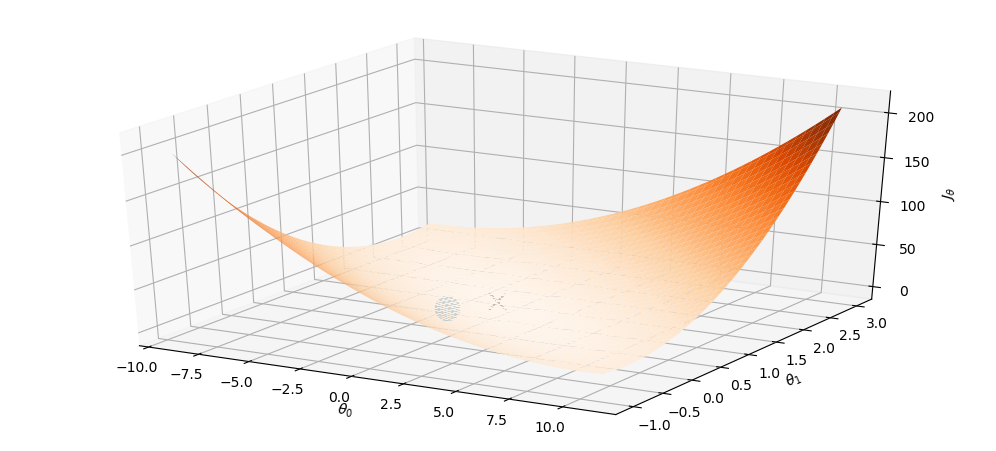

In [205]:
pygui(false)
figure(figsize=[12.6, 5.6])
surf(a, b, data, cmap="Oranges")

xlabel(L"\theta_0")
ylabel(L"\theta_1")
zlabel(L"J_{\theta}")

scatter3D(theta[1, 1], theta[1, 2], cost(theta[1, :], x, y)+10, s=300)
scatter3D(theta[2, 1], theta[2, 2], cost(theta[2, :], x, y), c="black", marker="x", s=150)

#scatter3D(theta[1, 1], theta[1, 2], cost(theta[1, :], x, y), s=100)

savefig("cost_func_surf.svg", optimize=true, format="svg", transparent=true)

In [43]:
function cost(theta, x, y)
    sum((theta[1] .+ theta[2].*x .- y).^2) / (2*length(y))
end

cost (generic function with 1 method)

In [127]:
cost(theta[1, :], x, y)
cost(theta[2, :], x, y)

0.38540310477497364